In [1]:
import os
os.chdir(os.path.join(os.getcwd(), '..'))

In [23]:
from dataset.labeled_dataset import EEGLabeledDataset
from torch.utils.data import DataLoader
import torch
from tqdm import tqdm

dataset = EEGLabeledDataset(
    data_path='/root/giant_data',
    cache_processed_path='/root/giant_cache',
    train_length=73728, dataset_mode="full",
    rebuild_cache=False, limit=None,
    target_config={
    "user_id": True,
    "activity": False, },
    clipped_threshold=100
)
loader = DataLoader(dataset, 128, shuffle=True, drop_last=False)
next(iter(loader))['data'].shape


torch.Size([128, 4, 73728])

In [26]:
means = []
stds = []
for d in tqdm(loader):
    d['data'] = d['data'].cuda()
    mn = d['data'].mean(axis=2).flatten().cpu()
    st = d['data'].std(axis=2).flatten().cpu()
    means.extend(mn.tolist())
    stds.extend(st.tolist())
    

100%|██████████| 399/399 [06:18<00:00,  1.05it/s]


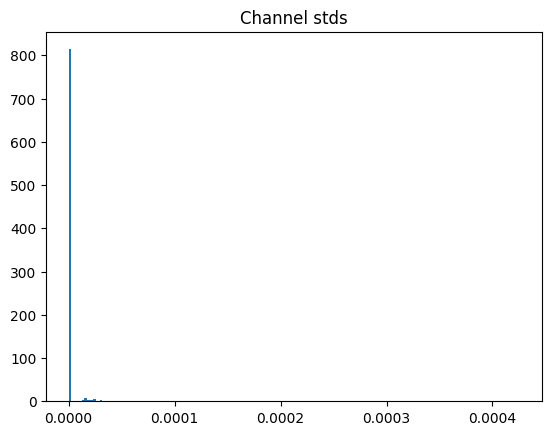

In [76]:
import matplotlib.pyplot as plt 

k = torch.tensor(stds)

plt.hist(k[k < 0.01], bins=200)
plt.title("Channel stds")
None

In [64]:
((k < 0.5) | (k > 1.5)).sum(), ((k < 0.5) | (k > 1.5)).shape

(tensor(1770), torch.Size([203804]))

In [71]:
(k > 1.99).sum()

tensor(104)

In [67]:
k[k < 10].max()

tensor(2.0000)

In [87]:
((k < 0.5) | (k > 1.5)).sum(), k.shape

(tensor(1770), torch.Size([203804]))

In [43]:
torch.tensor(means).isnan().sum(), torch.tensor(means).isinf().sum()

(tensor(8), tensor(0))

In [44]:
torch.tensor(stds).isnan().sum(), torch.tensor(stds).isinf().sum()

(tensor(8), tensor(0))

In [85]:
torch.tensor(float("-inf")).isinf()

tensor(True)

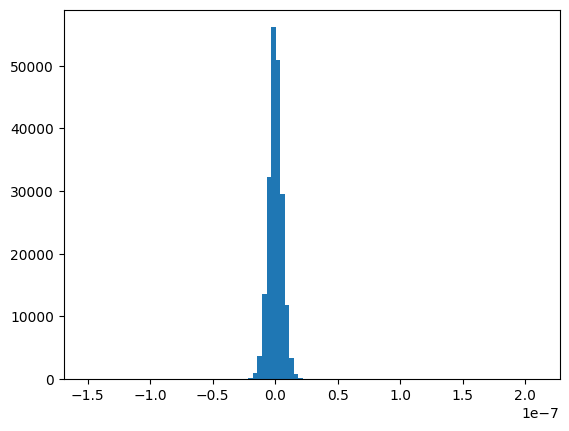

In [35]:

import matplotlib.pyplot as plt 

plt.hist(means, bins=100)
None


In [14]:
d = next(iter(loader))['data']
d.shape
d.mean(axis=2).flatten(), d.std(axis=2).flatten()

(torch.Size([64]), torch.Size([64]))